In [1]:
import mplfinance as mpf
import requests
import pandas as pd
import re
import time


import plotly.graph_objects as go
import plotly.subplots as ms
import talib
import matplotlib.pyplot as plt     # 점찍기용


import matplotlib.pyplot as plt    # 히트맵용
import seaborn as sns              # 히트맵용
import numpy as np
from pandas import Series, DataFrame

In [2]:
test1 = pd.read_csv('016710.KS.csv', encoding='cp949')
test1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,7940.0,8030.0,7920.0,7950.0,7278.461914,7739
1,2018-01-03,7910.0,8000.0,7880.0,7930.0,7260.151367,13915
2,2018-01-04,7920.0,8140.0,7920.0,8060.0,7379.169922,35524
3,2018-01-05,8060.0,8600.0,7960.0,8000.0,7324.238281,153200
4,2018-01-08,8090.0,8180.0,8080.0,8130.0,7443.256836,28534
...,...,...,...,...,...,...,...
1307,2023-04-24,129100.0,131300.0,91100.0,91100.0,91100.000000,48208
1308,2023-04-25,63800.0,63800.0,63800.0,63800.0,63800.000000,34817
1309,2023-04-26,44700.0,44700.0,44700.0,44700.0,44700.000000,59047
1310,2023-04-27,31300.0,31300.0,31300.0,31300.0,31300.000000,223105


In [3]:
# date, close, volume만 남기기

test1 = test1[['Date', 'Close', 'Volume']]
test1

,Date,Close,Volume
0,2018-01-02,7950.0,7739
1,2018-01-03,7930.0,13915
2,2018-01-04,8060.0,35524
3,2018-01-05,8000.0,153200
4,2018-01-08,8130.0,28534
...,...,...,...
1307,2023-04-24,91100.0,48208
1308,2023-04-25,63800.0,34817
1309,2023-04-26,44700.0,59047
1310,2023-04-27,31300.0,223105


In [4]:
test2 = pd.read_csv('게시글_016710.csv', encoding='cp949')
test2

,날짜,게시글
0,2017-06-19,76
1,2017-06-20,25
2,2017-06-21,11
3,2017-06-22,16
4,2017-06-23,1
...,...,...
722,2023-04-27,1106
723,2023-04-28,1650
724,2023-04-29,136
725,2023-04-30,96


In [5]:
test1.index = pd.DatetimeIndex(test1['Date'])
test1

,Date,Close,Volume
Date,,,
2018-01-02,2018-01-02,7950.0,7739
2018-01-03,2018-01-03,7930.0,13915
2018-01-04,2018-01-04,8060.0,35524
2018-01-05,2018-01-05,8000.0,153200
2018-01-08,2018-01-08,8130.0,28534
...,...,...,...
2023-04-24,2023-04-24,91100.0,48208
2023-04-25,2023-04-25,63800.0,34817
2023-04-26,2023-04-26,44700.0,59047


In [6]:
test2.index = pd.DatetimeIndex(test2['날짜'])
test2

,날짜,게시글
날짜,,
2017-06-19,2017-06-19,76
2017-06-20,2017-06-20,25
2017-06-21,2017-06-21,11
2017-06-22,2017-06-22,16
2017-06-23,2017-06-23,1
...,...,...
2023-04-27,2023-04-27,1106
2023-04-28,2023-04-28,1650
2023-04-29,2023-04-29,136


In [7]:
# https://ddaaadd.tistory.com/154

m = test1.join(test2)

m

,Date,Close,Volume,날짜,게시글
Date,,,,,
2018-01-02,2018-01-02,7950.0,7739,NaN,NaN
2018-01-03,2018-01-03,7930.0,13915,2018-01-03,2.0
2018-01-04,2018-01-04,8060.0,35524,2018-01-04,9.0
2018-01-05,2018-01-05,8000.0,153200,2018-01-05,13.0
2018-01-08,2018-01-08,8130.0,28534,2018-01-08,2.0
...,...,...,...,...,...
2023-04-24,2023-04-24,91100.0,48208,2023-04-24,193.0
2023-04-25,2023-04-25,63800.0,34817,2023-04-25,459.0
2023-04-26,2023-04-26,44700.0,59047,2023-04-26,814.0


In [8]:
m.head(20)

,Date,Close,Volume,날짜,게시글
Date,,,,,
2018-01-02,2018-01-02,7950.0,7739,NaN,NaN
2018-01-03,2018-01-03,7930.0,13915,2018-01-03,2.0
2018-01-04,2018-01-04,8060.0,35524,2018-01-04,9.0
2018-01-05,2018-01-05,8000.0,153200,2018-01-05,13.0
2018-01-08,2018-01-08,8130.0,28534,2018-01-08,2.0
2018-01-09,2018-01-09,8070.0,20152,NaN,NaN
2018-01-10,2018-01-10,8100.0,11001,NaN,NaN
2018-01-11,2018-01-11,8050.0,14099,2018-01-11,3.0
2018-01-12,2018-01-12,8030.0,15916,2018-01-12,2.0


In [9]:
m = m.rename(columns={'날짜': 'naver_date', '게시글': 'Post'})

In [10]:
heatmap_data = m[["Close", "Volume", "Post"]]

<Axes: title={'center': '016710.KS'}>

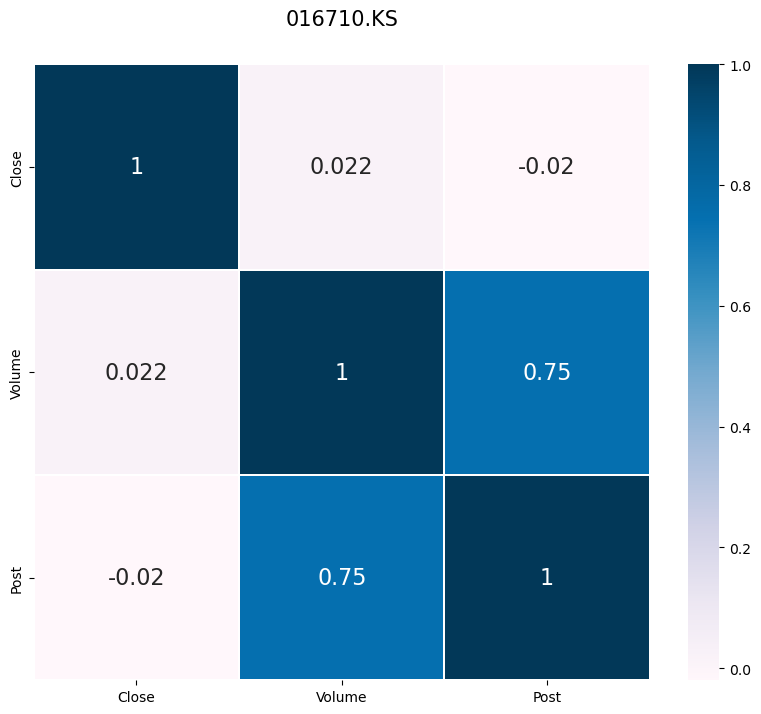

In [11]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("016710.KS", y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})